In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
os.chdir('F:\Python\Projects\IBM laundering project')

In [3]:
df = pd.read_csv('HI-Small_Trans.csv')

In [4]:
curr_count = pd.DataFrame(df.groupby('Receiving Currency')['Receiving Currency'].agg('count'))
curr_count = curr_count.rename({'Receiving Currency': 'freq_of_curr'}, axis=1)
curr_count.sort_values(by='freq_of_curr', ascending=False)

,freq_of_curr
Receiving Currency,
US Dollar,1879341
Euro,1172017
Swiss Franc,237884
Yuan,206551
Shekel,194988
Rupee,192065
UK Pound,181255
Ruble,157361
Yen,156319


In [5]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [6]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [8]:
df.columns = pd.Series(df.columns).apply(lambda x: x.lower())

In [9]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [11]:
df[['from bank', 'to bank']] = df[['from bank', 'to bank']].astype('string')

In [12]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   from bank           string        
 2   account             object        
 3   to bank             string        
 4   account.1           object        
 5   amount received     float64       
 6   receiving currency  object        
 7   amount paid         float64       
 8   payment currency    object        
 9   payment format      object        
 10  is laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), string(2)
memory usage: 426.2+ MB


In [14]:
def curr_to_dollar(val, curr):
    exchange_rates = [('Australian Dollar', 0.67),
                     ('Yuan', 0.15),
                     ('US Dollar', 1),
                     ('Euro', 1.08),
                     ('Yen', 0.0076),
                     ('Rupee', 0.012),
                     ('UK Pound', 1.22),
                     ('Saudi Riyal', 0.27),
                     ('Ruble', 0.013),
                     ('Canadian Dollar', 0.72),
                     ('Swiss Franc', 1.09),
                     ('Bitcoin', 27455.80),
                     ('Mexican Peso', 0.054),
                     ('Shekel', 0.28),
                     ('Brazil Real', 0.19)]
    for currency in exchange_rates:
        if curr == currency[0]:
            usd_val = val * currency[1]
            return usd_val

In [15]:
# In order to make analysis more objective and easier I'm going to add two columns with currencies converted to USD
usd_received = []
usd_payed = []
for r in tqdm(df.itertuples()):
    usd_val_received = curr_to_dollar(r[6], r[7])
    usd_val_payed = curr_to_dollar(r[8], r[9])
    usd_received.append(usd_val_received)
    usd_payed.append(usd_val_payed)
df['received_in_usd'] = usd_received
df['paid_in_usd'] = usd_payed

5078345it [00:38, 131048.82it/s]


In [16]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0,3697.340000,3697.340000
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0,0.010000,0.010000
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0,14675.570000,14675.570000
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0,2806.970000,2806.970000
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0,36682.970000,36682.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0,4255.044972,4255.044972
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0,2968.740742,2968.740742
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0,136.949530,136.949530
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0,1054.769469,1054.769469


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   from bank           string        
 2   account             object        
 3   to bank             string        
 4   account.1           object        
 5   amount received     float64       
 6   receiving currency  object        
 7   amount paid         float64       
 8   payment currency    object        
 9   payment format      object        
 10  is laundering       int64         
 11  received_in_usd     float64       
 12  paid_in_usd         float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5), string(2)
memory usage: 503.7+ MB


In [18]:
df[['received_in_usd', 'paid_in_usd']] = df[['received_in_usd', 'paid_in_usd']].astype('float32')

In [19]:
df = df.sort_values(by='timestamp')
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [20]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
0,2022-09-01 00:00:00,121,8123FB9B0,121,8123FB9B0,47.64,Saudi Riyal,47.64,Saudi Riyal,Reinvestment,0,12.862800,12.862800
1,2022-09-01 00:00:00,25170,8095AF7C0,25170,8095AF7C0,3917.42,Canadian Dollar,3917.42,Canadian Dollar,Reinvestment,0,2820.542480,2820.542480
2,2022-09-01 00:00:00,25665,809A7D4B0,24779,809189BA0,97.49,Canadian Dollar,97.49,Canadian Dollar,Credit Card,0,70.192802,70.192802
3,2022-09-01 00:00:00,32317,800D4E490,12004,800D4E750,13939.05,Euro,13939.05,Euro,Wire,0,15054.173828,15054.173828
4,2022-09-01 00:00:00,1024,800C8D9D0,1024,800C8D9D0,10.37,Euro,10.37,Euro,Reinvestment,0,11.199600,11.199600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-18 10:02:00,9371,8043A0FB0,16163,802F78670,3749.14,US Dollar,3749.14,US Dollar,ACH,1,3749.139893,3749.139893
5078341,2022-09-18 11:18:00,9371,8043A0FB0,9371,8043A0FB0,1785.27,Euro,2091.95,US Dollar,ACH,0,1928.091553,2091.949951
5078342,2022-09-18 11:18:00,9371,8043A0FB0,13858,8095526B0,1785.27,Euro,1785.27,Euro,ACH,1,1928.091553,1928.091553
5078343,2022-09-18 12:58:00,9371,8043A0FB0,1124,8026687E0,2154.54,US Dollar,2154.54,US Dollar,ACH,1,2154.540039,2154.540039


In [21]:
df.to_parquet('cleaned_data.parquet', index=False)

## Data understanding. In this part I'm going to do some EDA and plot everything I am interested in

In [22]:
print(f'There is {(len(df[df["is laundering"] == 1]) / len(df)) * 100}% of laundering transactions in dataset')

There is 0.10194266045335636% of laundering transactions in dataset


In [23]:
from scipy import stats
stats.ttest_ind(np.log(df['received_in_usd']), np.log(df['paid_in_usd']))

Ttest_indResult(statistic=0.08581244793602283, pvalue=0.9316155126515888)

In [24]:
df.describe()
# There is some extreme values in the data

,amount received,amount paid,is laundering,received_in_usd,paid_in_usd
count,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,5.988726e+06,4.509273e+06,1.019427e-03,3.489394e+05,3.498094e+05
std,1.037183e+09,8.697728e+08,3.191219e-02,2.410315e+07,2.417813e+07
min,1.000000e-06,1.000000e-06,0.000000e+00,7.600000e-05,7.600000e-05
25%,1.833700e+02,1.844800e+02,0.000000e+00,1.559400e+02,1.559492e+02
50%,1.411010e+03,1.414540e+03,0.000000e+00,8.843040e+02,8.843364e+02
75%,1.234627e+04,1.229784e+04,0.000000e+00,5.278101e+03,5.278470e+03
max,1.046302e+12,1.046302e+12,1.000000e+00,2.849301e+10,2.849301e+10


In [25]:
from collections import Counter
def outliers_detector(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    interquartile_range = q3 - q1
    lowest = q1 - 1.5*interquartile_range
    highest = q3 + 1.5*interquartile_range
    results = np.where((data>highest) | (data<lowest), 1, 0)
    return {"Ranges": (lowest, highest), "outliers_num": Counter(results)}

def outliers_detector2(data):
    num_out = 0
    data = np.log(data)
    mean = data.mean()
    std = data.std()
    result = anomaly_func(data, mean, std)
    result = np.where(result<0.02, 1, 0)
    return Counter(result)

def anomaly_func(x, mean, std):
    result = (1 / (std * np.sqrt(2*np.pi)) * (np.exp(-((x - mean)**2 / 2*std**2))))
    return result

In [26]:
outs = outliers_detector(df["received_in_usd"])

In [27]:
outliers_detector2(df['received_in_usd'])

Counter({1: 4111316, 0: 967029})

In [28]:
extreme_data = df[(df['received_in_usd'] < outs['Ranges'][0]) | (df['received_in_usd'] > outs['Ranges'][1])]
print(len(extreme_data))
print(len(extreme_data) / len(df))
# So from the whole dataset, there 16.7% of observations have extreme values. 
# It's possible that this data is transactions of some businesses.

852210
0.16781254522880978


In [29]:
print(df['from bank'].nunique())
print(df['to bank'].nunique())

30470
15811


In [30]:
df['receiving currency'].value_counts()

US Dollar            1879341
Euro                 1172017
Swiss Franc           237884
Yuan                  206551
Shekel                194988
Rupee                 192065
UK Pound              181255
Ruble                 157361
Yen                   156319
Bitcoin               148151
Canadian Dollar       141357
Australian Dollar     138511
Mexican Peso          111030
Saudi Riyal            89971
Brazil Real            71544
Name: receiving currency, dtype: int64

In [31]:
df.groupby(['is laundering', 'receiving currency'])['received_in_usd'].agg('mean')

is laundering  receiving currency
0              Australian Dollar     2.282591e+05
               Bitcoin               5.635023e+05
               Brazil Real           8.952036e+05
               Canadian Dollar       3.102038e+05
               Euro                  2.779020e+05
               Mexican Peso          3.729797e+05
               Ruble                 8.685424e+05
               Rupee                 5.759992e+05
               Saudi Riyal           1.838167e+05
               Shekel                2.977440e+05
               Swiss Franc           3.378147e+05
               UK Pound              3.048193e+05
               US Dollar             3.133160e+05
               Yen                   3.731472e+05
               Yuan                  2.580561e+05
1              Australian Dollar     9.477569e+05
               Bitcoin               1.717023e+04
               Brazil Real           8.025264e+03
               Canadian Dollar       1.284006e+08
               E

In [32]:
df.groupby(['is laundering', 'receiving currency'])['received_in_usd'].agg('median')

is laundering  receiving currency
0              Australian Dollar      879.294617
               Bitcoin               1808.458618
               Brazil Real           1031.014160
               Canadian Dollar        822.045593
               Euro                   794.566772
               Mexican Peso          1056.826416
               Ruble                  960.702332
               Rupee                  837.519592
               Saudi Riyal            934.980286
               Shekel                 884.200806
               Swiss Franc            854.036804
               UK Pound               825.976624
               US Dollar              881.719971
               Yen                    792.822937
               Yuan                  1010.616028
1              Australian Dollar     3806.122559
               Bitcoin               6805.523926
               Brazil Real           4762.526855
               Canadian Dollar       5399.082031
               Euro                

In [33]:
df['payment currency'].value_counts()

US Dollar            1895172
Euro                 1168297
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146066
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: payment currency, dtype: int64

In [34]:
df['payment format'].value_counts()

Cheque          1864331
Credit Card     1323324
ACH              600797
Cash             490891
Reinvestment     481056
Wire             171855
Bitcoin          146091
Name: payment format, dtype: int64

In [35]:
df.groupby(['is laundering', 'payment format'])['received_in_usd'].agg('mean')

is laundering  payment format
0              ACH               8.425585e+05
               Bitcoin           5.714576e+05
               Cash              4.938480e+05
               Cheque            3.927530e+05
               Credit Card       3.732174e+03
               Reinvestment      2.485056e+05
               Wire              3.582368e+05
1              ACH               5.686518e+06
               Bitcoin           1.717023e+04
               Cash              2.742389e+05
               Cheque            3.545609e+05
               Credit Card       3.035024e+03
Name: received_in_usd, dtype: float32

In [36]:
df.groupby(['is laundering', 'payment format'])['received_in_usd'].agg('median')

is laundering  payment format
0              ACH               1071.167236
               Bitcoin           1916.854126
               Cash               864.270020
               Cheque            1061.038818
               Credit Card        590.473999
               Reinvestment      1074.005127
               Wire               482.887573
1              ACH               6620.879883
               Bitcoin           6805.523926
               Cash               602.481567
               Cheque            1353.340332
               Credit Card        522.432617
Name: received_in_usd, dtype: float32

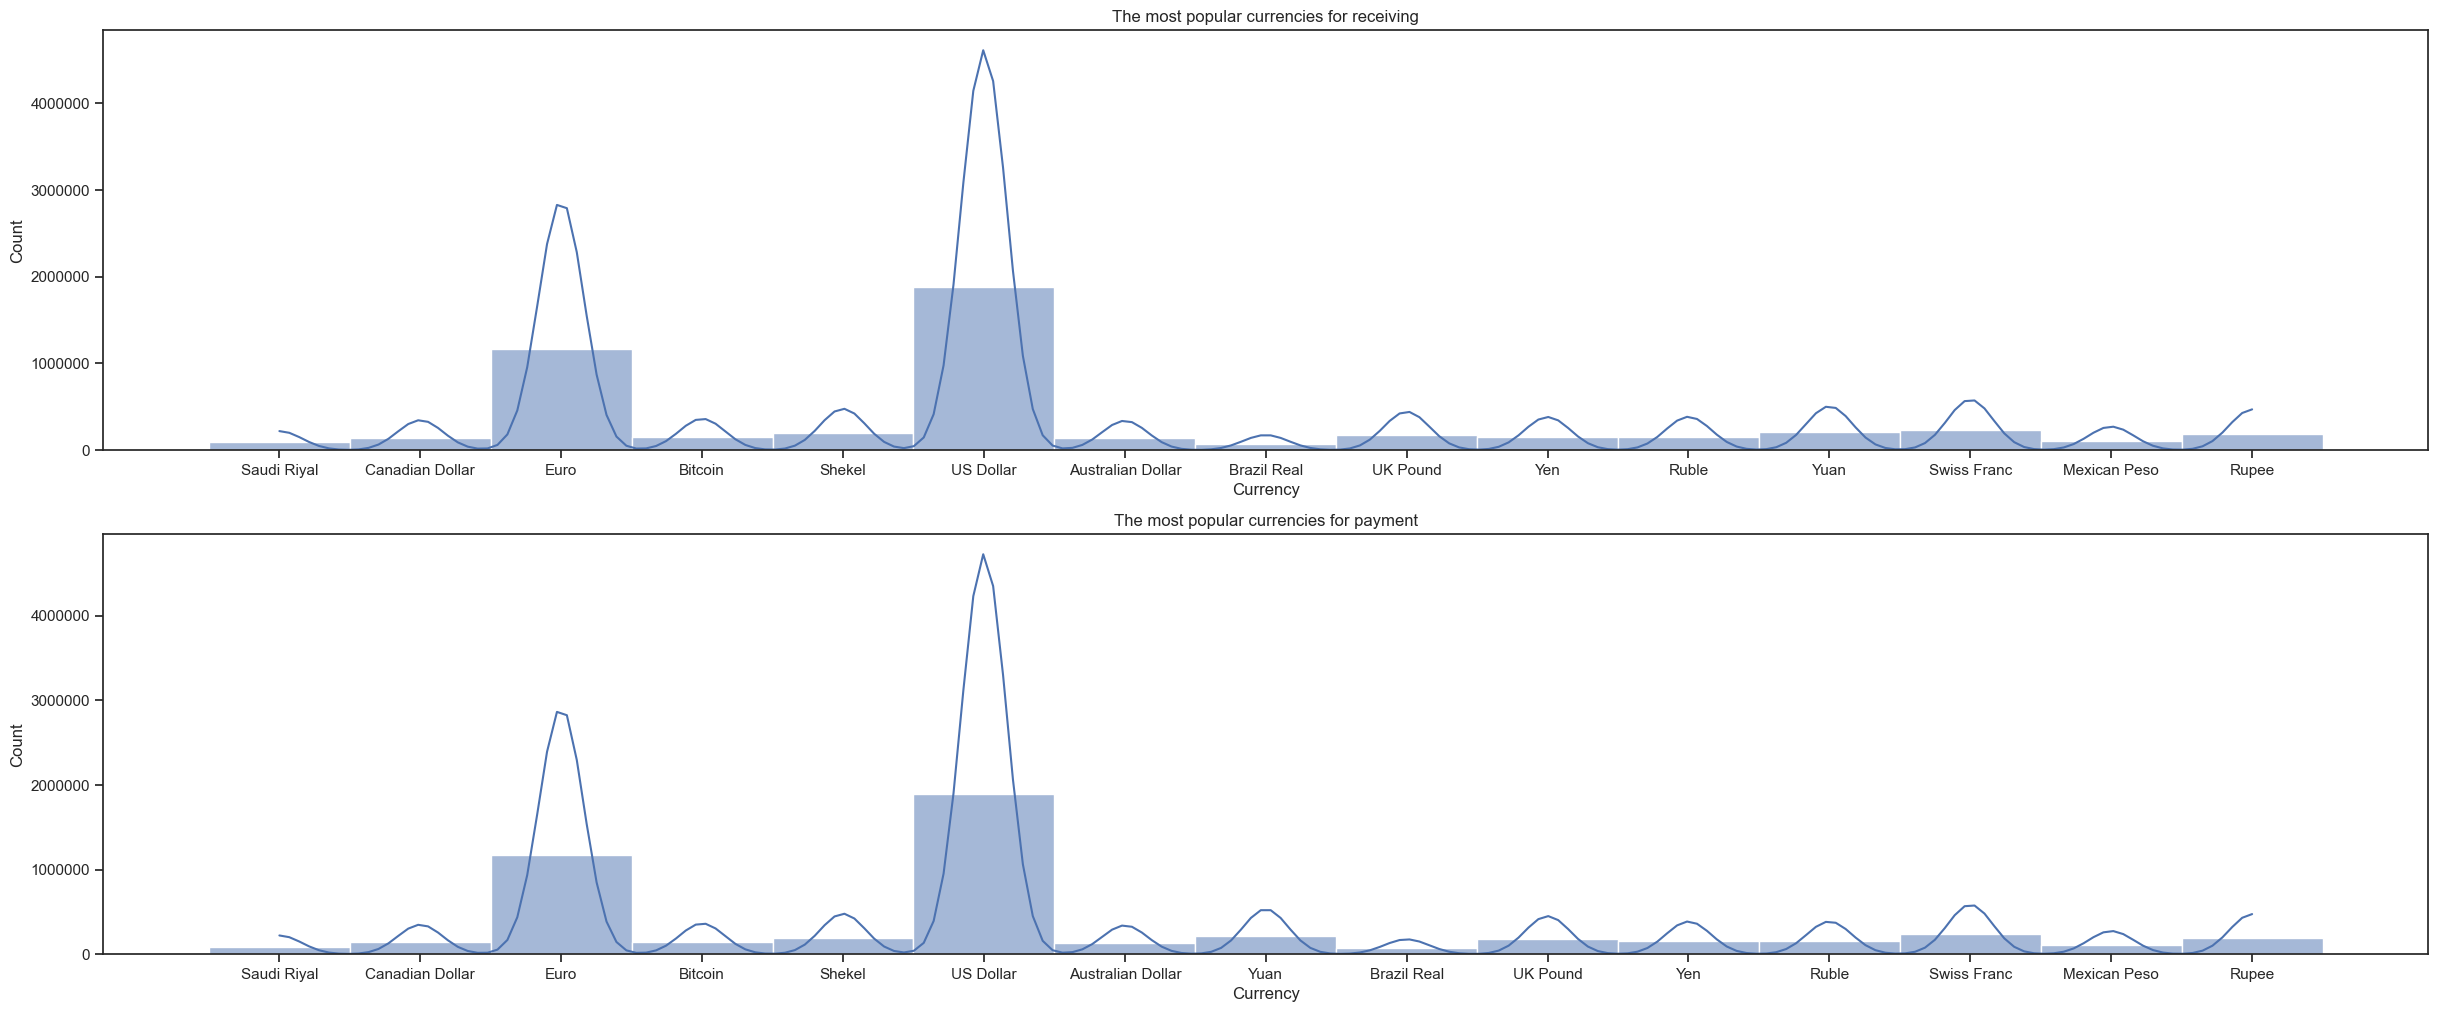

In [37]:
sns.set_theme(style="ticks")
plt.figure(figsize=(30, 12))
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(data=df, x='receiving currency', kde=True)
plt.title('The most popular currencies for receiving')
plt.xlabel('Currency')
plt.subplot(2, 1, 2)
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(data=df, x='payment currency', kde=True)
plt.title('The most popular currencies for payment')
plt.xlabel('Currency')
plt.show()

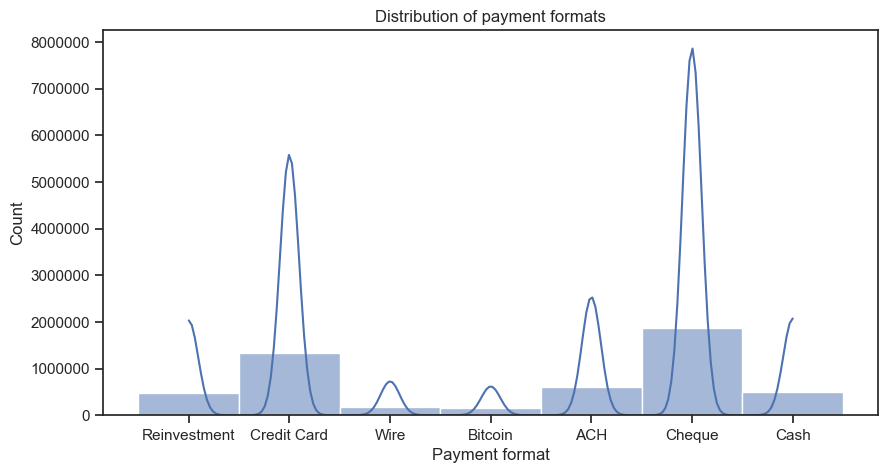

In [38]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(data=df, x='payment format', kde=True)
plt.xlabel('Payment format')
plt.title('Distribution of payment formats')
plt.show()

In [39]:
# I am going to divide my dataset into two parts: only laundering and only normal 
only_laun = df[df['is laundering'] == 1]
only_normal = df[df['is laundering'] == 0]

In [40]:
only_normal

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
0,2022-09-01 00:00:00,121,8123FB9B0,121,8123FB9B0,47.64,Saudi Riyal,47.64,Saudi Riyal,Reinvestment,0,12.862800,12.862800
1,2022-09-01 00:00:00,25170,8095AF7C0,25170,8095AF7C0,3917.42,Canadian Dollar,3917.42,Canadian Dollar,Reinvestment,0,2820.542480,2820.542480
2,2022-09-01 00:00:00,25665,809A7D4B0,24779,809189BA0,97.49,Canadian Dollar,97.49,Canadian Dollar,Credit Card,0,70.192802,70.192802
3,2022-09-01 00:00:00,32317,800D4E490,12004,800D4E750,13939.05,Euro,13939.05,Euro,Wire,0,15054.173828,15054.173828
4,2022-09-01 00:00:00,1024,800C8D9D0,1024,800C8D9D0,10.37,Euro,10.37,Euro,Reinvestment,0,11.199600,11.199600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078327,2022-09-17 14:06:00,29404,8041A3440,29404,8041A3440,8053.24,Euro,9436.65,US Dollar,ACH,0,8697.499023,9436.650391
5078331,2022-09-17 18:10:00,9371,8043A0FB0,9371,8043A0FB0,2078.06,Euro,2435.04,US Dollar,ACH,0,2244.304688,2435.040039
5078335,2022-09-18 06:21:00,29404,8041A3440,29404,8041A3440,12376.11,Euro,14502.12,US Dollar,ACH,0,13366.199219,14502.120117
5078339,2022-09-18 09:55:00,29404,8041A3440,29404,8041A3440,2391.92,Saudi Riyal,637.66,US Dollar,ACH,0,645.818420,637.659973


In [41]:
only_laun

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
17112,2022-09-01 00:01:00,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1,7.929200e+02,7.929200e+02
33231,2022-09-01 00:03:00,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1,1.317143e+07,1.317143e+07
34782,2022-09-01 00:03:00,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1,2.902433e+04,2.902433e+04
43470,2022-09-01 00:03:00,1467,8013C4030,20,80BC62F10,58702.10,Yuan,58702.10,Yuan,ACH,1,8.805315e+03,8.805315e+03
45786,2022-09-01 00:04:00,119,811C597B0,48309,811C599A0,34254.65,Saudi Riyal,34254.65,Saudi Riyal,ACH,1,9.248756e+03,9.248756e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078338,2022-09-18 09:55:00,29404,8041A3440,118,811A79C40,2391.92,Saudi Riyal,2391.92,Saudi Riyal,ACH,1,6.458184e+02,6.458184e+02
5078340,2022-09-18 10:02:00,9371,8043A0FB0,16163,802F78670,3749.14,US Dollar,3749.14,US Dollar,ACH,1,3.749140e+03,3.749140e+03
5078342,2022-09-18 11:18:00,9371,8043A0FB0,13858,8095526B0,1785.27,Euro,1785.27,Euro,ACH,1,1.928092e+03,1.928092e+03
5078343,2022-09-18 12:58:00,9371,8043A0FB0,1124,8026687E0,2154.54,US Dollar,2154.54,US Dollar,ACH,1,2.154540e+03,2.154540e+03


In [42]:
only_normal.describe()

,amount received,amount paid,is laundering,received_in_usd,paid_in_usd
count,5.073168e+06,5.073168e+06,5073168.0,5.073168e+06,5.073168e+06
mean,5.957962e+06,4.477000e+06,0.0,3.442417e+05,3.451127e+05
std,1.036563e+09,8.688463e+08,0.0,2.306763e+07,2.314603e+07
min,1.000000e-06,1.000000e-06,0.0,7.600000e-05,7.600000e-05
25%,1.830700e+02,1.841600e+02,0.0,1.557000e+02,1.557036e+02
50%,1.407510e+03,1.410990e+03,0.0,8.821700e+02,8.822133e+02
75%,1.232251e+04,1.227934e+04,0.0,5.264211e+03,5.264214e+03
max,1.046302e+12,1.046302e+12,0.0,2.849301e+10,2.849301e+10


In [43]:
only_laun.describe()

,amount received,amount paid,is laundering,received_in_usd,paid_in_usd
count,5.177000e+03,5.177000e+03,5177.0,5.177000e+03,5.177000e+03
mean,3.613531e+07,3.613531e+07,1.0,4.952432e+06,4.952432e+06
std,1.527919e+09,1.527919e+09,0.0,2.200818e+08,2.200818e+08
min,3.227000e-03,3.227000e-03,1.0,3.564000e-01,3.564000e-01
25%,2.634970e+03,2.634970e+03,1.0,2.102933e+03,2.102933e+03
50%,8.667210e+03,8.667210e+03,1.0,5.840050e+03,5.840050e+03
75%,1.883227e+04,1.883227e+04,1.0,1.330636e+04,1.330636e+04
max,8.485314e+10,8.485314e+10,1.0,1.548050e+10,1.548050e+10


In [44]:
# There is pretty much banks so I want to check only top-10 banks among banks-senders and banks-receivers
from_laun = only_laun['from bank'].value_counts().sort_values(ascending=False)[:10].keys()
to_laun = only_laun['to bank'].value_counts().sort_values(ascending=False)[:10].keys()
from_norm = only_normal['from bank'].value_counts().sort_values(ascending=False)[:10].keys()
to_norm = only_normal['to bank'].value_counts().sort_values(ascending=False)[:10].keys()

In [45]:
def bank_df(val, col, norm=False):
    if norm:
        bank_df = only_normal[only_normal[col] == val]
    else:
        bank_df = only_laun[only_laun[col] == val]
    return bank_df

In [46]:
from_Ldf = [bank_df(i, 'from bank') for i in from_laun]
from_Ldf = pd.concat(from_Ldf)
to_Ldf = [bank_df(j, 'to bank') for j in to_laun]
to_Ldf = pd.concat(to_Ldf)
from_Ndf = [bank_df(k, 'from bank', norm=True) for k in from_norm]
from_Ndf = pd.concat(from_Ndf)
to_Ndf = [bank_df(l, 'to bank', norm=True) for l in to_norm]
to_Ndf = pd.concat(to_Ndf)


In [47]:
from_Ldf

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
17112,2022-09-01 00:01:00,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1,7.929200e+02,7.929200e+02
33231,2022-09-01 00:03:00,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1,1.317143e+07,1.317143e+07
34782,2022-09-01 00:03:00,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1,2.902433e+04,2.902433e+04
67948,2022-09-01 00:06:00,70,100428858,8,8090A6540,66.06,Canadian Dollar,66.06,Canadian Dollar,Cash,1,4.756320e+01,4.756320e+01
108734,2022-09-01 00:09:00,70,100428738,10656,8044072A0,37080124.05,Yen,37080124.05,Yen,Cheque,1,2.818089e+05,2.818089e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078300,2022-09-16 12:59:00,118,811B6E170,222,811D80C30,6379.01,Saudi Riyal,6379.01,Saudi Riyal,ACH,1,1.722333e+03,1.722333e+03
5078311,2022-09-17 00:03:00,118,811B6E170,223,811B9B160,48801.01,Saudi Riyal,48801.01,Saudi Riyal,ACH,1,1.317627e+04,1.317627e+04
5078315,2022-09-17 05:57:00,118,811B6E170,121,8000E1590,40089.33,Saudi Riyal,40089.33,Saudi Riyal,ACH,1,1.082412e+04,1.082412e+04
5078322,2022-09-17 09:39:00,118,811B6E170,119,811DCA9B0,13001.02,Saudi Riyal,13001.02,Saudi Riyal,ACH,1,3.510275e+03,3.510275e+03


In [48]:
to_Ldf

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
66096,2022-09-01 00:06:00,21174,800737690,12,80011F990,2.848960e+03,Euro,2.848960e+03,Euro,ACH,1,3076.876709,3076.876709
537711,2022-09-01 06:46:00,23,8001FE5D0,12,800054B70,1.874897e+04,US Dollar,1.874897e+04,US Dollar,ACH,1,18748.970703,18748.970703
842902,2022-09-01 15:53:00,11318,8011AB110,12,8011B4A60,3.275200e+02,US Dollar,3.275200e+02,US Dollar,ACH,1,327.519989,327.519989
876305,2022-09-01 16:53:00,2591,8009DEA60,12,8009DED80,5.936500e+02,Euro,5.936500e+02,Euro,ACH,1,641.142029,641.142029
932705,2022-09-01 18:34:00,27,80B715490,12,80B715D30,4.144251e+04,Mexican Peso,4.144251e+04,Mexican Peso,ACH,1,2237.895508,2237.895508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077938,2022-09-13 05:28:00,28611,80AA89060,15,803DE4A90,1.031278e+08,Yen,1.031278e+08,Yen,ACH,1,783771.250000,783771.250000
5078000,2022-09-13 11:27:00,214749,805DB7F20,15,80AD14210,2.715244e+04,Australian Dollar,2.715244e+04,Australian Dollar,ACH,1,18192.134766,18192.134766
5078020,2022-09-13 12:50:00,11808,804622AD0,15,803DE4A90,1.509335e+06,Yen,1.509335e+06,Yen,ACH,1,11470.946289,11470.946289
5078071,2022-09-13 17:58:00,17649,80C527330,15,803DE4A90,1.119153e+06,Yen,1.119153e+06,Yen,ACH,1,8505.559570,8505.559570


In [49]:
from_Ndf

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
18,2022-09-01 00:00:00,70,1004286A8,1522,800C05510,5280.29,Euro,5280.29,Euro,Cash,0,5702.713379,5702.713379
52,2022-09-01 00:00:00,70,1004286A8,1547,800DEEF30,7788.86,Euro,7788.86,Euro,Cheque,0,8411.968750,8411.968750
69,2022-09-01 00:00:00,70,1004286A8,23,8009C94C0,670.32,Euro,670.32,Euro,Credit Card,0,723.945618,723.945618
96,2022-09-01 00:00:00,70,100428858,125645,809B499D0,3058.45,Canadian Dollar,3058.45,Canadian Dollar,Credit Card,0,2202.083984,2202.083984
311,2022-09-01 00:00:00,70,100428660,10642,8147D3210,1463.34,US Dollar,1463.34,US Dollar,Cheque,0,1463.339966,1463.339966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076711,2022-09-10 23:56:00,211,807DF69F0,21174,80887A6F0,2636.88,US Dollar,2636.88,US Dollar,Credit Card,0,2636.879883,2636.879883
5077013,2022-09-10 23:58:00,211,8000AF480,6,80A1B1970,50.88,Australian Dollar,50.88,Australian Dollar,Cash,0,34.089600,34.089600
5077015,2022-09-10 23:58:00,211,807C33EB0,22091,8086909E0,76.33,UK Pound,76.33,UK Pound,Credit Card,0,93.122597,93.122597
5077200,2022-09-10 23:59:00,211,8076D12E0,211,807ED94A0,112.65,UK Pound,112.65,UK Pound,Cash,0,137.432999,137.432999


In [50]:
to_Ndf

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
694,2022-09-01 00:00:00,10,8017C89F0,10,8017C89F0,1270437.90,US Dollar,1270437.90,US Dollar,Reinvestment,0,1.270438e+06,1.270438e+06
1394,2022-09-01 00:00:00,4242,8119E7050,10,80010BBD0,1.76,US Dollar,1.76,US Dollar,Credit Card,0,1.760000e+00,1.760000e+00
1817,2022-09-01 00:00:00,5836,81314F3A0,10,8131C71C0,19948.25,US Dollar,19948.25,US Dollar,Credit Card,0,1.994825e+04,1.994825e+04
1896,2022-09-01 00:00:00,1601,8005C9020,10,801231E70,179.35,US Dollar,179.35,US Dollar,Cheque,0,1.793500e+02,1.793500e+02
2140,2022-09-01 00:00:00,10,801158790,10,801158790,20898540.97,US Dollar,20898540.97,US Dollar,Reinvestment,0,2.089854e+07,2.089854e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076613,2022-09-10 23:55:00,6,80A138450,211,80A947500,130.09,Australian Dollar,130.09,Australian Dollar,Cheque,0,8.716030e+01,8.716030e+01
5076710,2022-09-10 23:56:00,211,807DF69F0,211,807DF69F0,2636.88,US Dollar,2041.48,UK Pound,ACH,0,2.636880e+03,2.490606e+03
5077200,2022-09-10 23:59:00,211,8076D12E0,211,807ED94A0,112.65,UK Pound,112.65,UK Pound,Cash,0,1.374330e+02,1.374330e+02
5077215,2022-09-10 23:59:00,70,1004288A0,211,80A142150,4225.82,Australian Dollar,4225.82,Australian Dollar,Cheque,0,2.831299e+03,2.831299e+03


In [51]:
from_Ldf

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering,received_in_usd,paid_in_usd
17112,2022-09-01 00:01:00,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1,7.929200e+02,7.929200e+02
33231,2022-09-01 00:03:00,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1,1.317143e+07,1.317143e+07
34782,2022-09-01 00:03:00,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1,2.902433e+04,2.902433e+04
67948,2022-09-01 00:06:00,70,100428858,8,8090A6540,66.06,Canadian Dollar,66.06,Canadian Dollar,Cash,1,4.756320e+01,4.756320e+01
108734,2022-09-01 00:09:00,70,100428738,10656,8044072A0,37080124.05,Yen,37080124.05,Yen,Cheque,1,2.818089e+05,2.818089e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078300,2022-09-16 12:59:00,118,811B6E170,222,811D80C30,6379.01,Saudi Riyal,6379.01,Saudi Riyal,ACH,1,1.722333e+03,1.722333e+03
5078311,2022-09-17 00:03:00,118,811B6E170,223,811B9B160,48801.01,Saudi Riyal,48801.01,Saudi Riyal,ACH,1,1.317627e+04,1.317627e+04
5078315,2022-09-17 05:57:00,118,811B6E170,121,8000E1590,40089.33,Saudi Riyal,40089.33,Saudi Riyal,ACH,1,1.082412e+04,1.082412e+04
5078322,2022-09-17 09:39:00,118,811B6E170,119,811DCA9B0,13001.02,Saudi Riyal,13001.02,Saudi Riyal,ACH,1,3.510275e+03,3.510275e+03


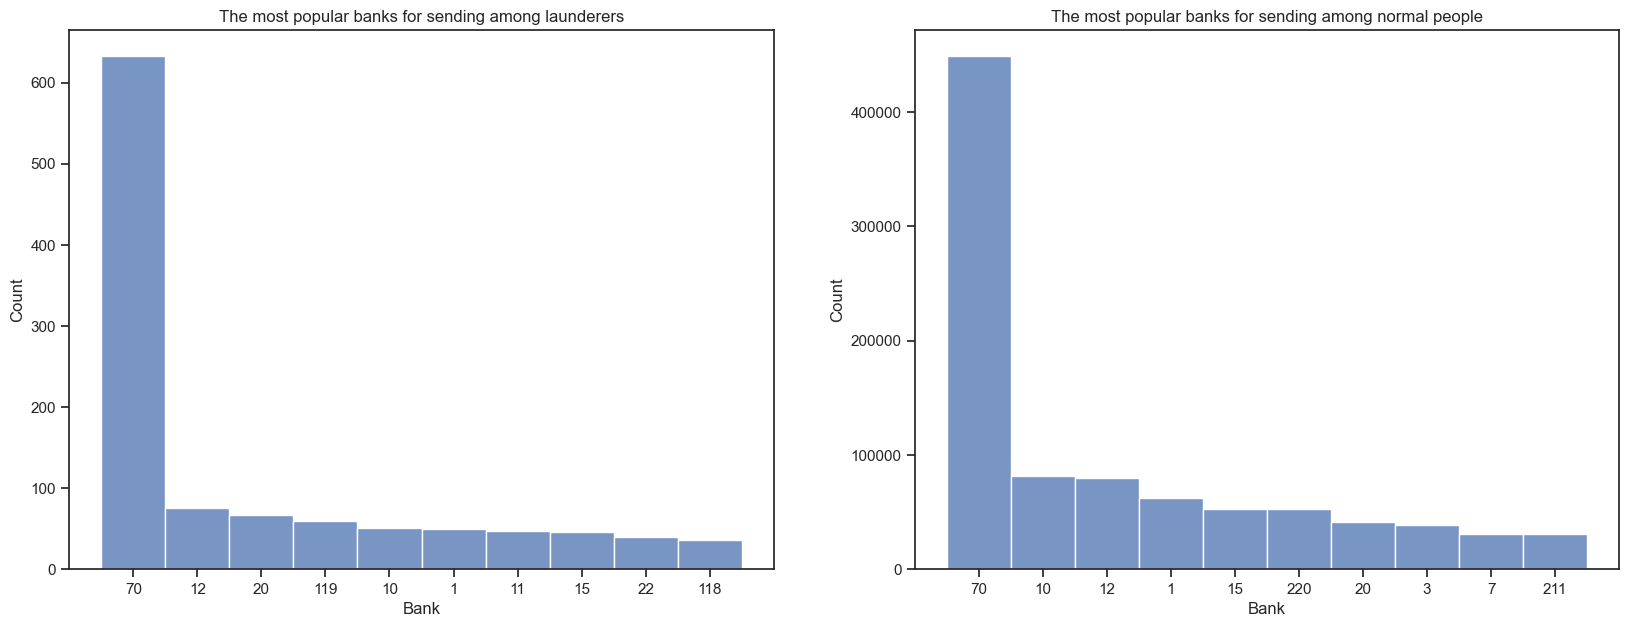

In [52]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=from_Ldf, x='from bank')
plt.xlabel('Bank')
plt.title('The most popular banks for sending among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=from_Ndf, x='from bank')
plt.xlabel('Bank')
plt.title('The most popular banks for sending among normal people')
plt.show()

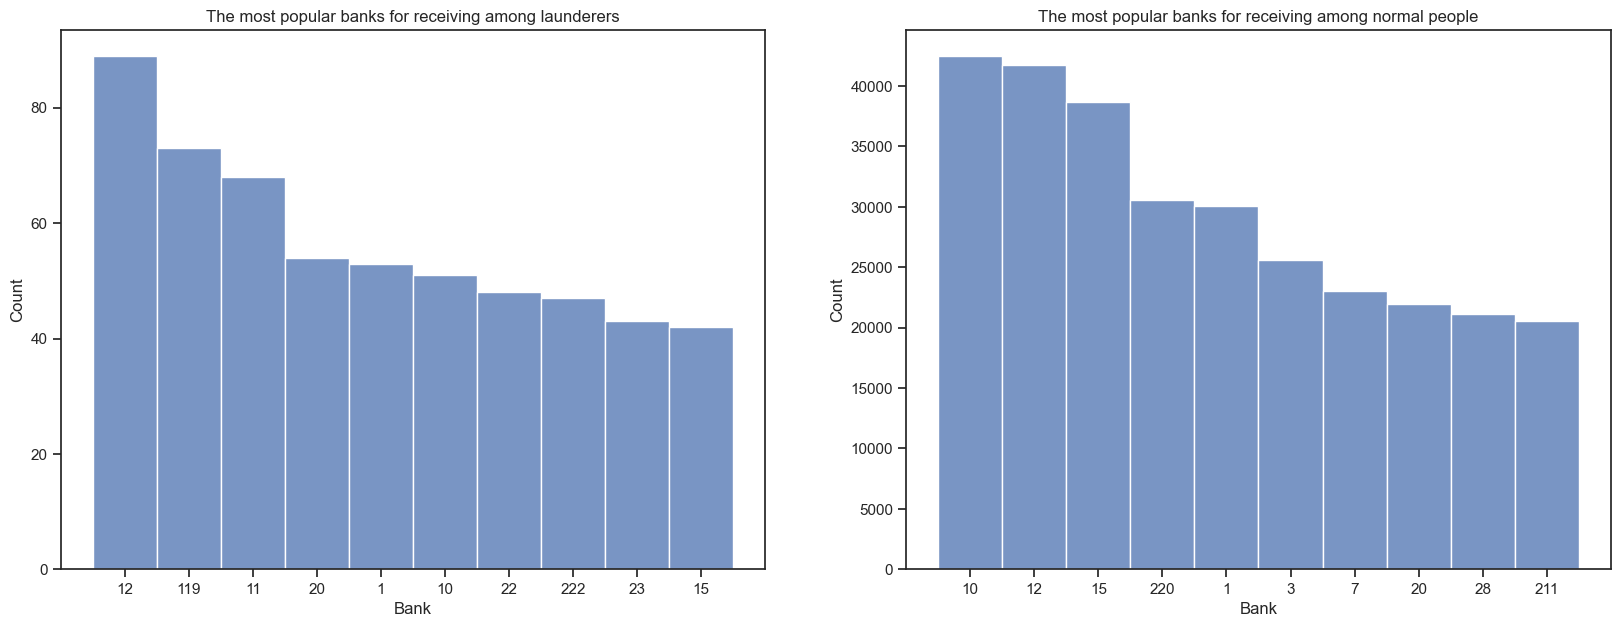

In [53]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=to_Ldf, x='to bank')
plt.xlabel('Bank')
plt.title('The most popular banks for receiving among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=to_Ndf, x='to bank')
plt.xlabel('Bank')
plt.title('The most popular banks for receiving among normal people')
plt.show()

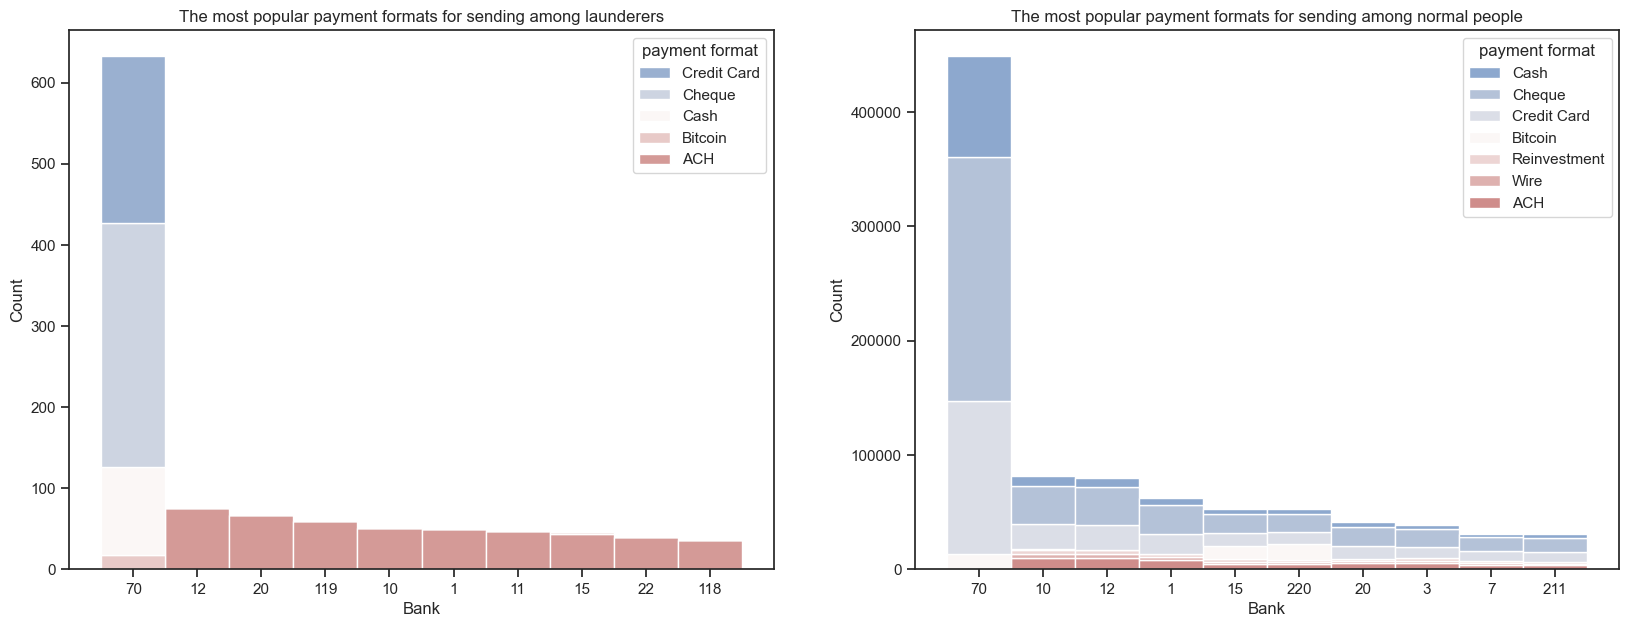

In [54]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=from_Ldf, x='from bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for sending among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=from_Ndf, x='from bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for sending among normal people')
plt.show()

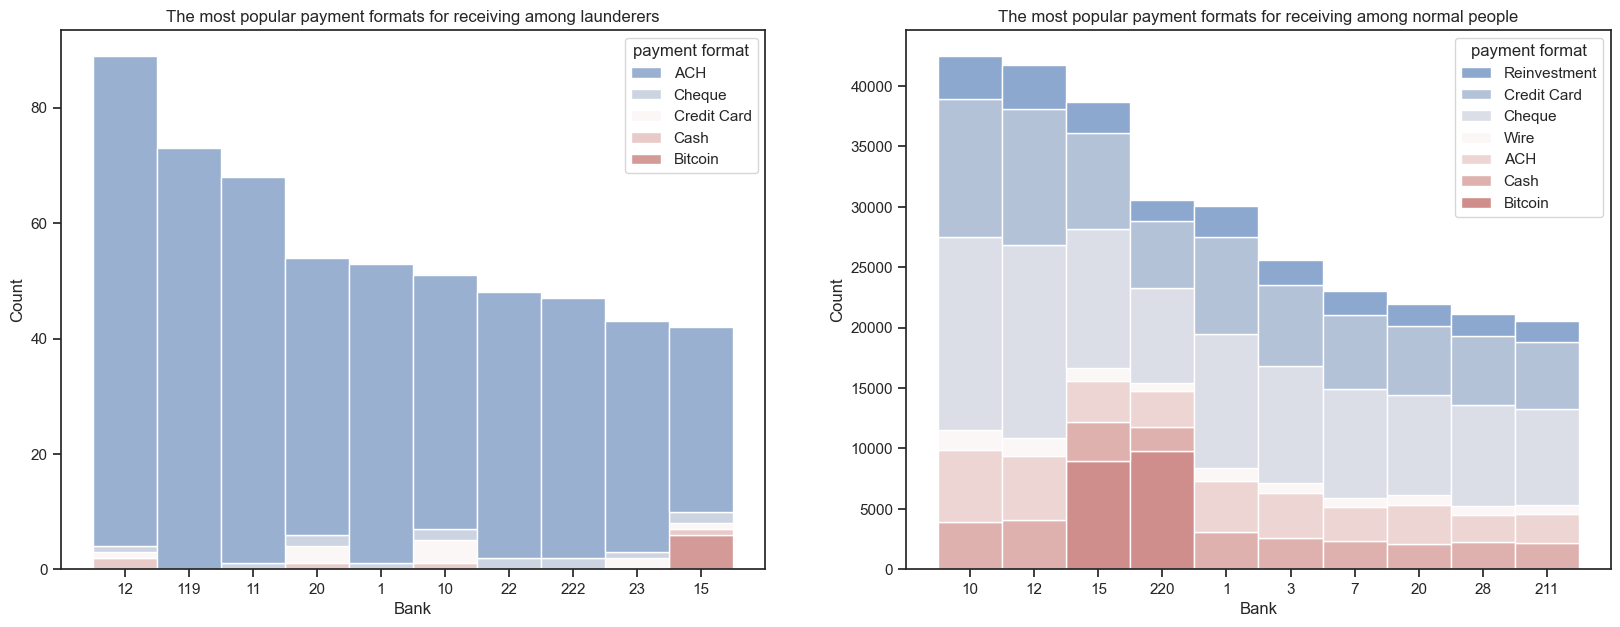

In [55]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=to_Ldf, x='to bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for receiving among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=to_Ndf, x='to bank', hue='payment format', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular payment formats for receiving among normal people')
plt.show()

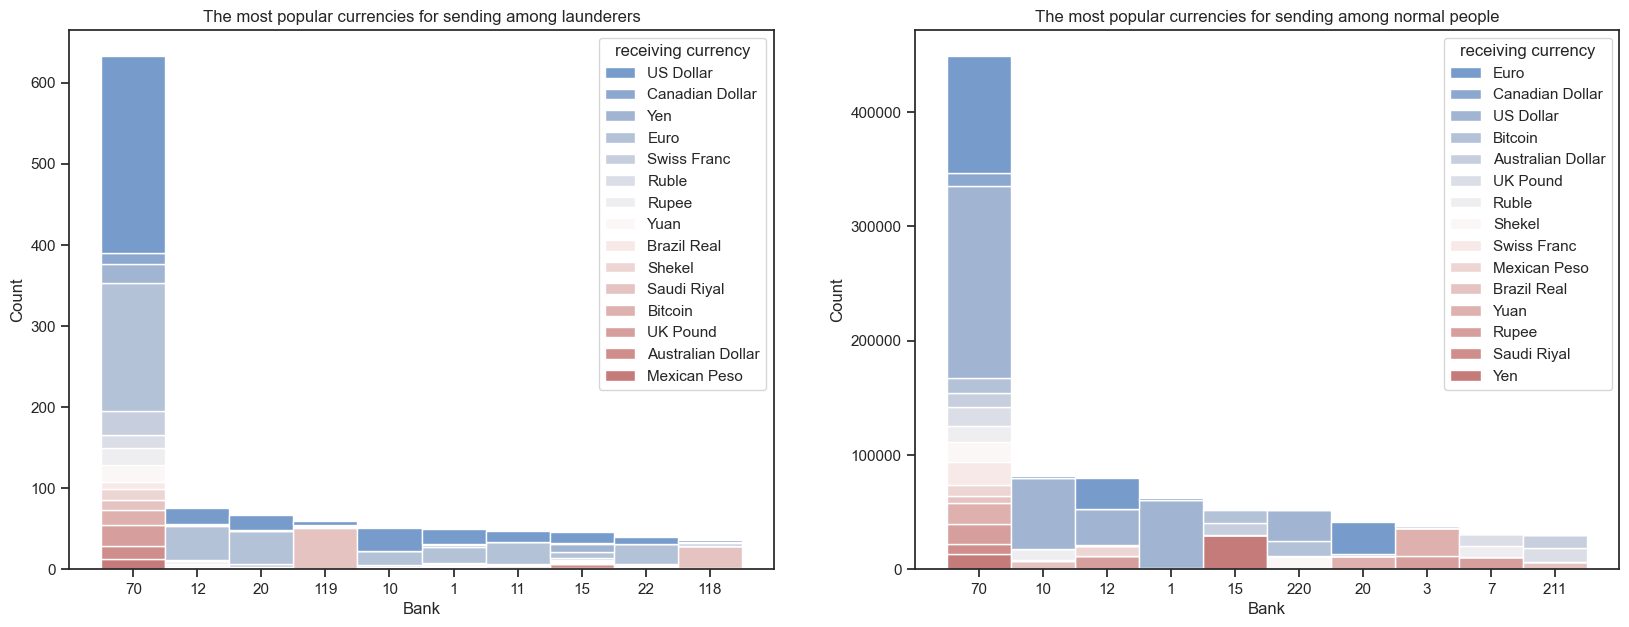

In [56]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=from_Ldf, x='from bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for sending among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=from_Ndf, x='from bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for sending among normal people')
plt.show()

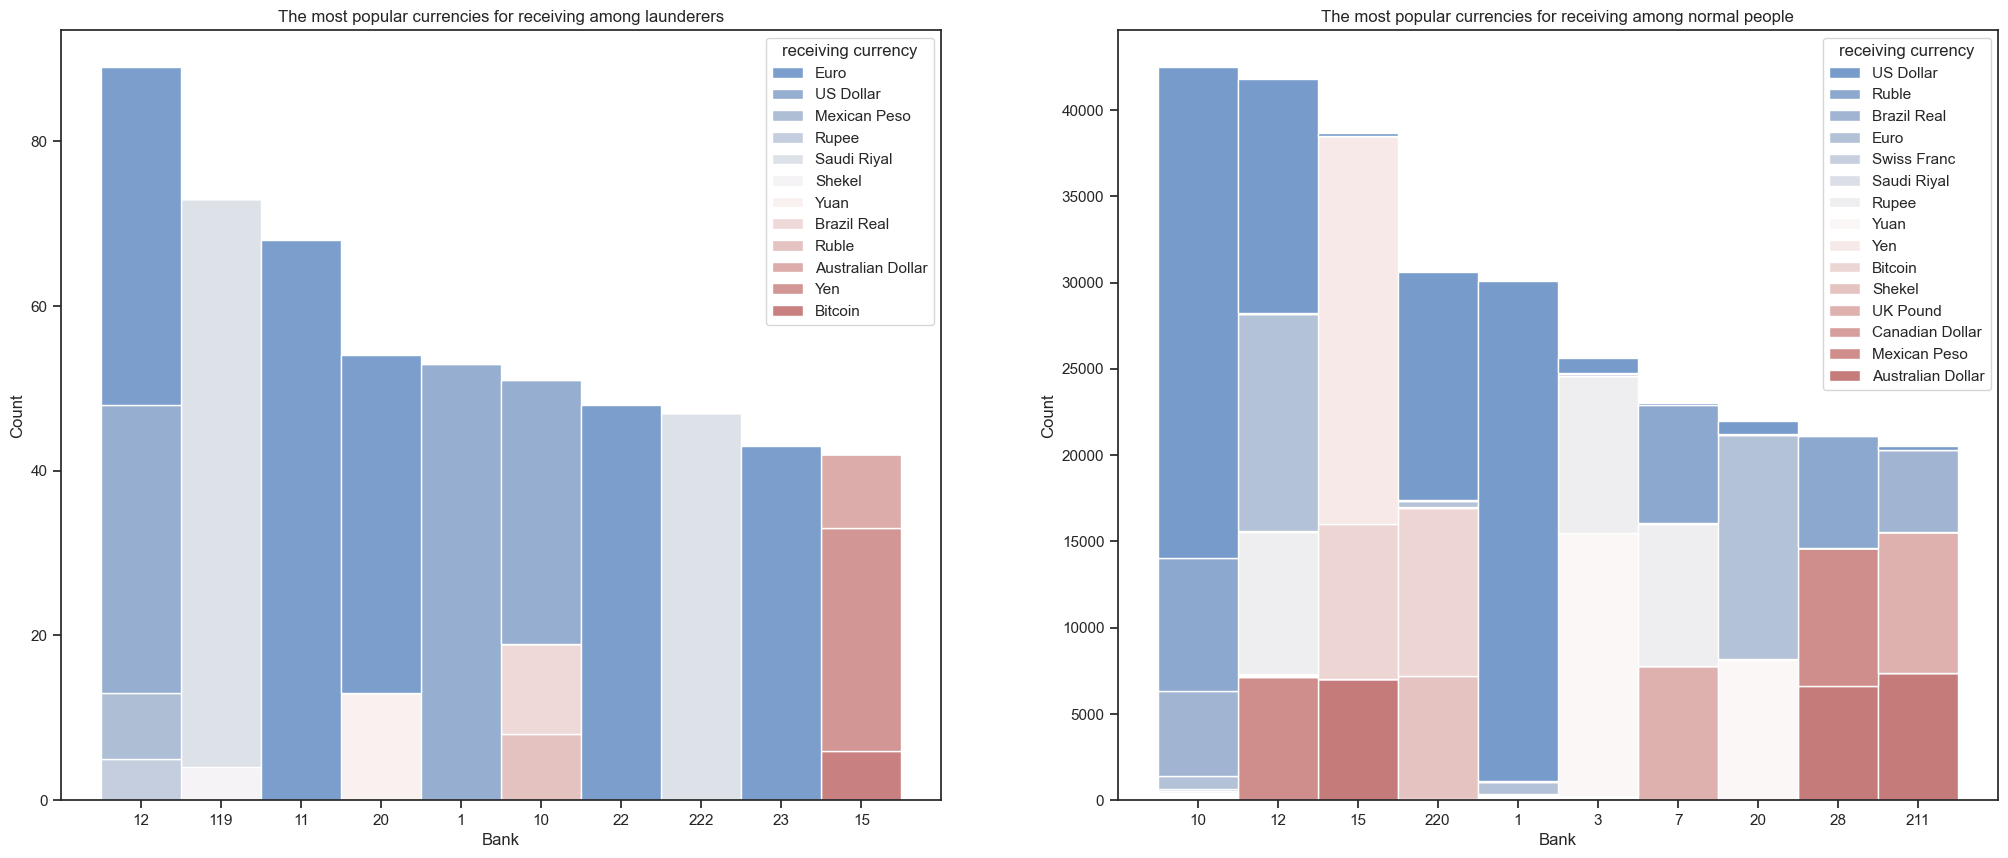

In [57]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=to_Ldf, x='to bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for receiving among launderers')
plt.subplot(1, 2, 2)
sns.histplot(data=to_Ndf, x='to bank', hue='receiving currency', multiple='stack', palette='vlag')
plt.xlabel('Bank')
plt.title('The most popular currencies for receiving among normal people')
plt.show()

In [58]:
large_amount_norm = pd.DataFrame(from_Ndf.groupby('from bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()
large_amount_laun = pd.DataFrame(from_Ldf.groupby('from bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()

In [59]:
large_amount_norm_to = pd.DataFrame(to_Ndf.groupby('to bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()
large_amount_laun_to = pd.DataFrame(to_Ldf.groupby('to bank')['received_in_usd'].agg('sum').sort_values(ascending=False)).reset_index()

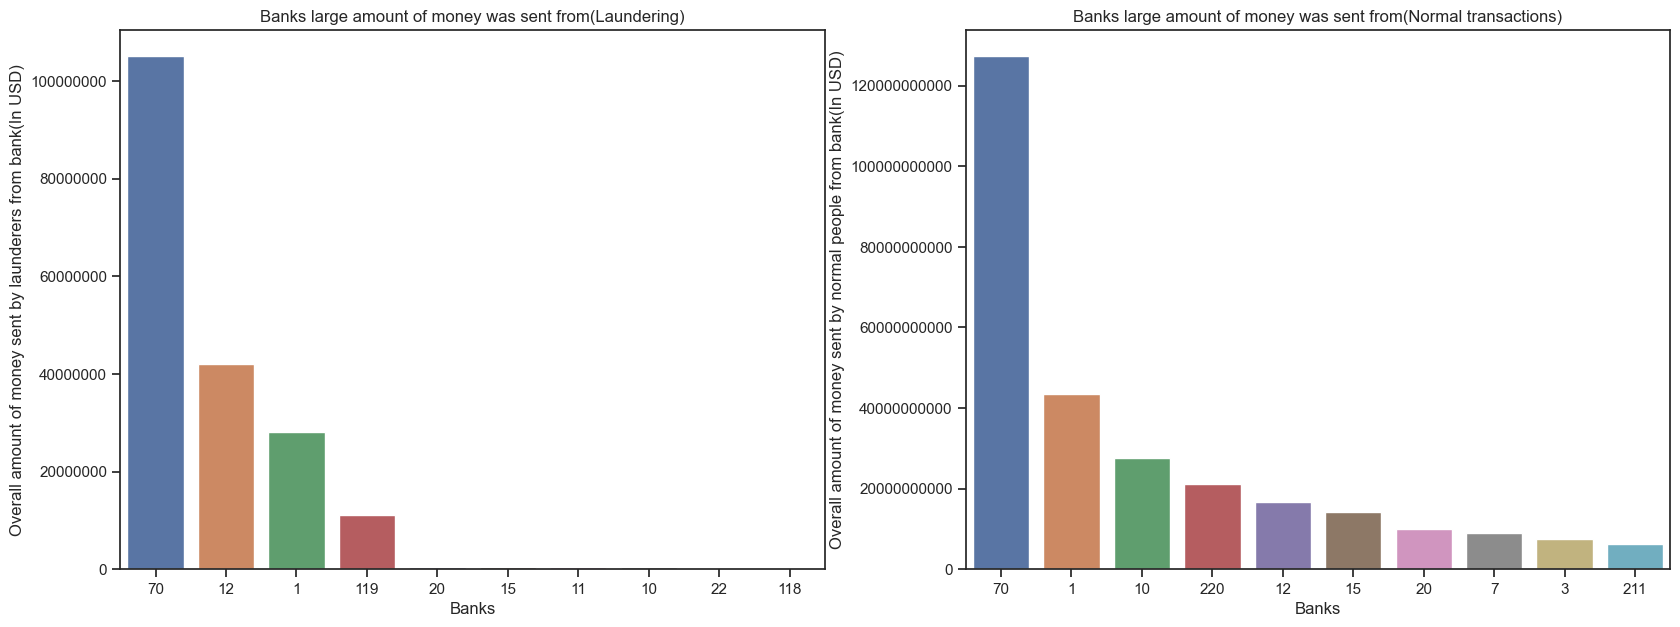

In [60]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_laun, x='from bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Overall amount of money sent by launderers from bank(In USD)')
plt.title('Banks large amount of money was sent from(Laundering)')
plt.subplot(1, 2, 2)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_norm, x='from bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Overall amount of money sent by normal people from bank(In USD)')
plt.title('Banks large amount of money was sent from(Normal transactions)')
plt.show()

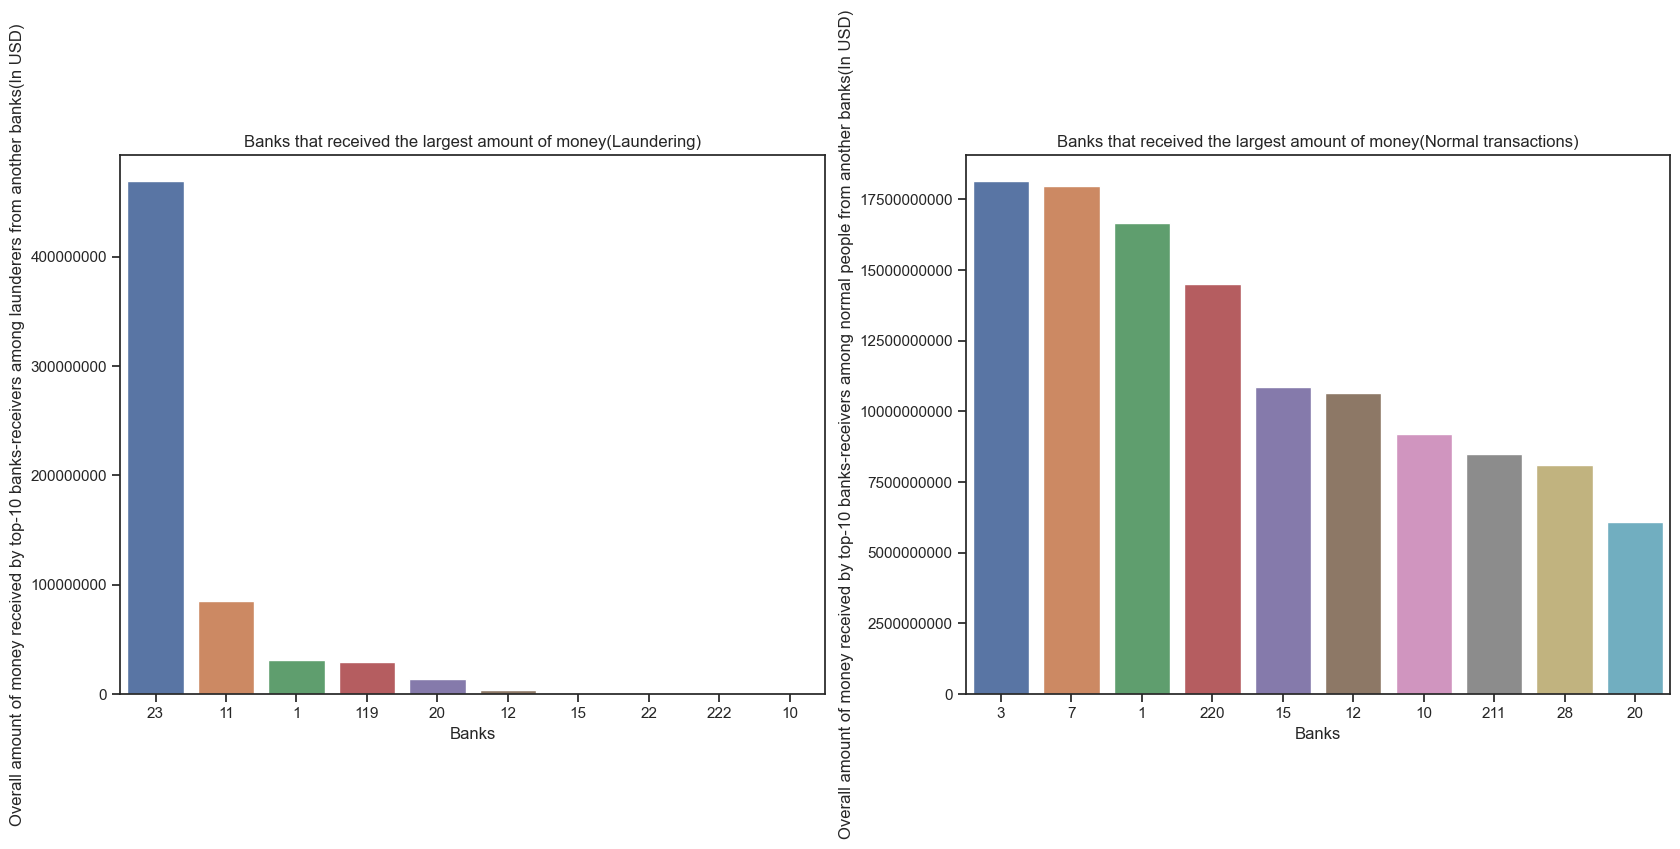

In [61]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_laun_to, x='to bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Sum of money received by top-10 banks-receivers among launderers from another banks(In USD)')
plt.title('Banks that received the largest amount of money(Laundering)')
plt.subplot(1, 2, 2)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=large_amount_norm_to, x='to bank', y='received_in_usd')
plt.xlabel('Banks')
plt.ylabel('Sum of money received by top-10 banks-receivers among normal people from another banks(In USD)')
plt.title('Banks that received the largest amount of money(Normal transactions)')
plt.show()

In [62]:
top_10_acc_overall_senders = df['account'].value_counts()[:10]
top_10_acc_laun_senders = only_laun['account'].value_counts()[:10]

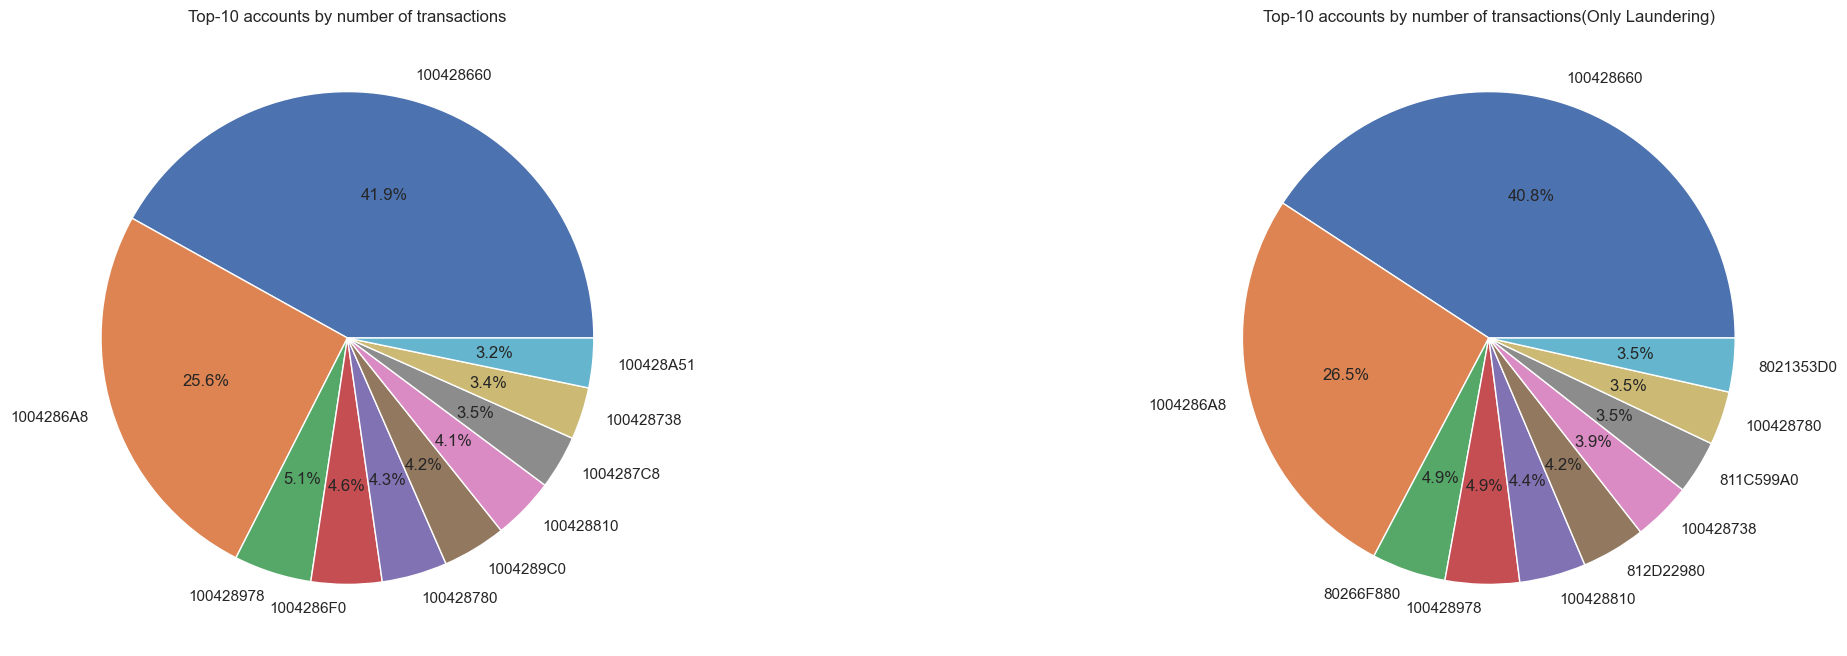

In [63]:
plt.figure(figsize=(27, 8))
plt.subplot(1, 2, 1)
plt.pie(top_10_acc_overall_senders.values, labels=top_10_acc_overall_senders.keys(), autopct='%1.1f%%')
plt.title('Top-10 accounts by number of transactions')
plt.subplot(1, 2, 2)
plt.pie(top_10_acc_laun_senders.values, labels=top_10_acc_laun_senders.keys(), autopct='%1.1f%%')
plt.title('Top-10 accounts by number of transactions(Only Laundering)')
plt.show()

## Insights
* The most popular payment format for receiving laundering is ACH
* The origin of most launderings is 70th bank. The main reason of that is that it's the most popular bank in general
* It's important to pay attention to most popular banks-receivers of launderings because most of them are different from bank that are popular among normal people
* A big part of launderings are received in US dollars and Euro. But we should also pay attention to Saudi Riyal because among launderers it's pretty common as well
* The most popular bank among launderers is 12th, according to charts, 23rd bank got the most of money, so conclusion is that large sums are sent to 23rd bank.
* One more interesting thing is that the accounts that have more normal taransactions, have more laundering transactions. Most likely it's some big businesses, that sometimes break the laws